# ISYE 6402: Module 1.4

## Bitcoin Price Exploratory Analysis

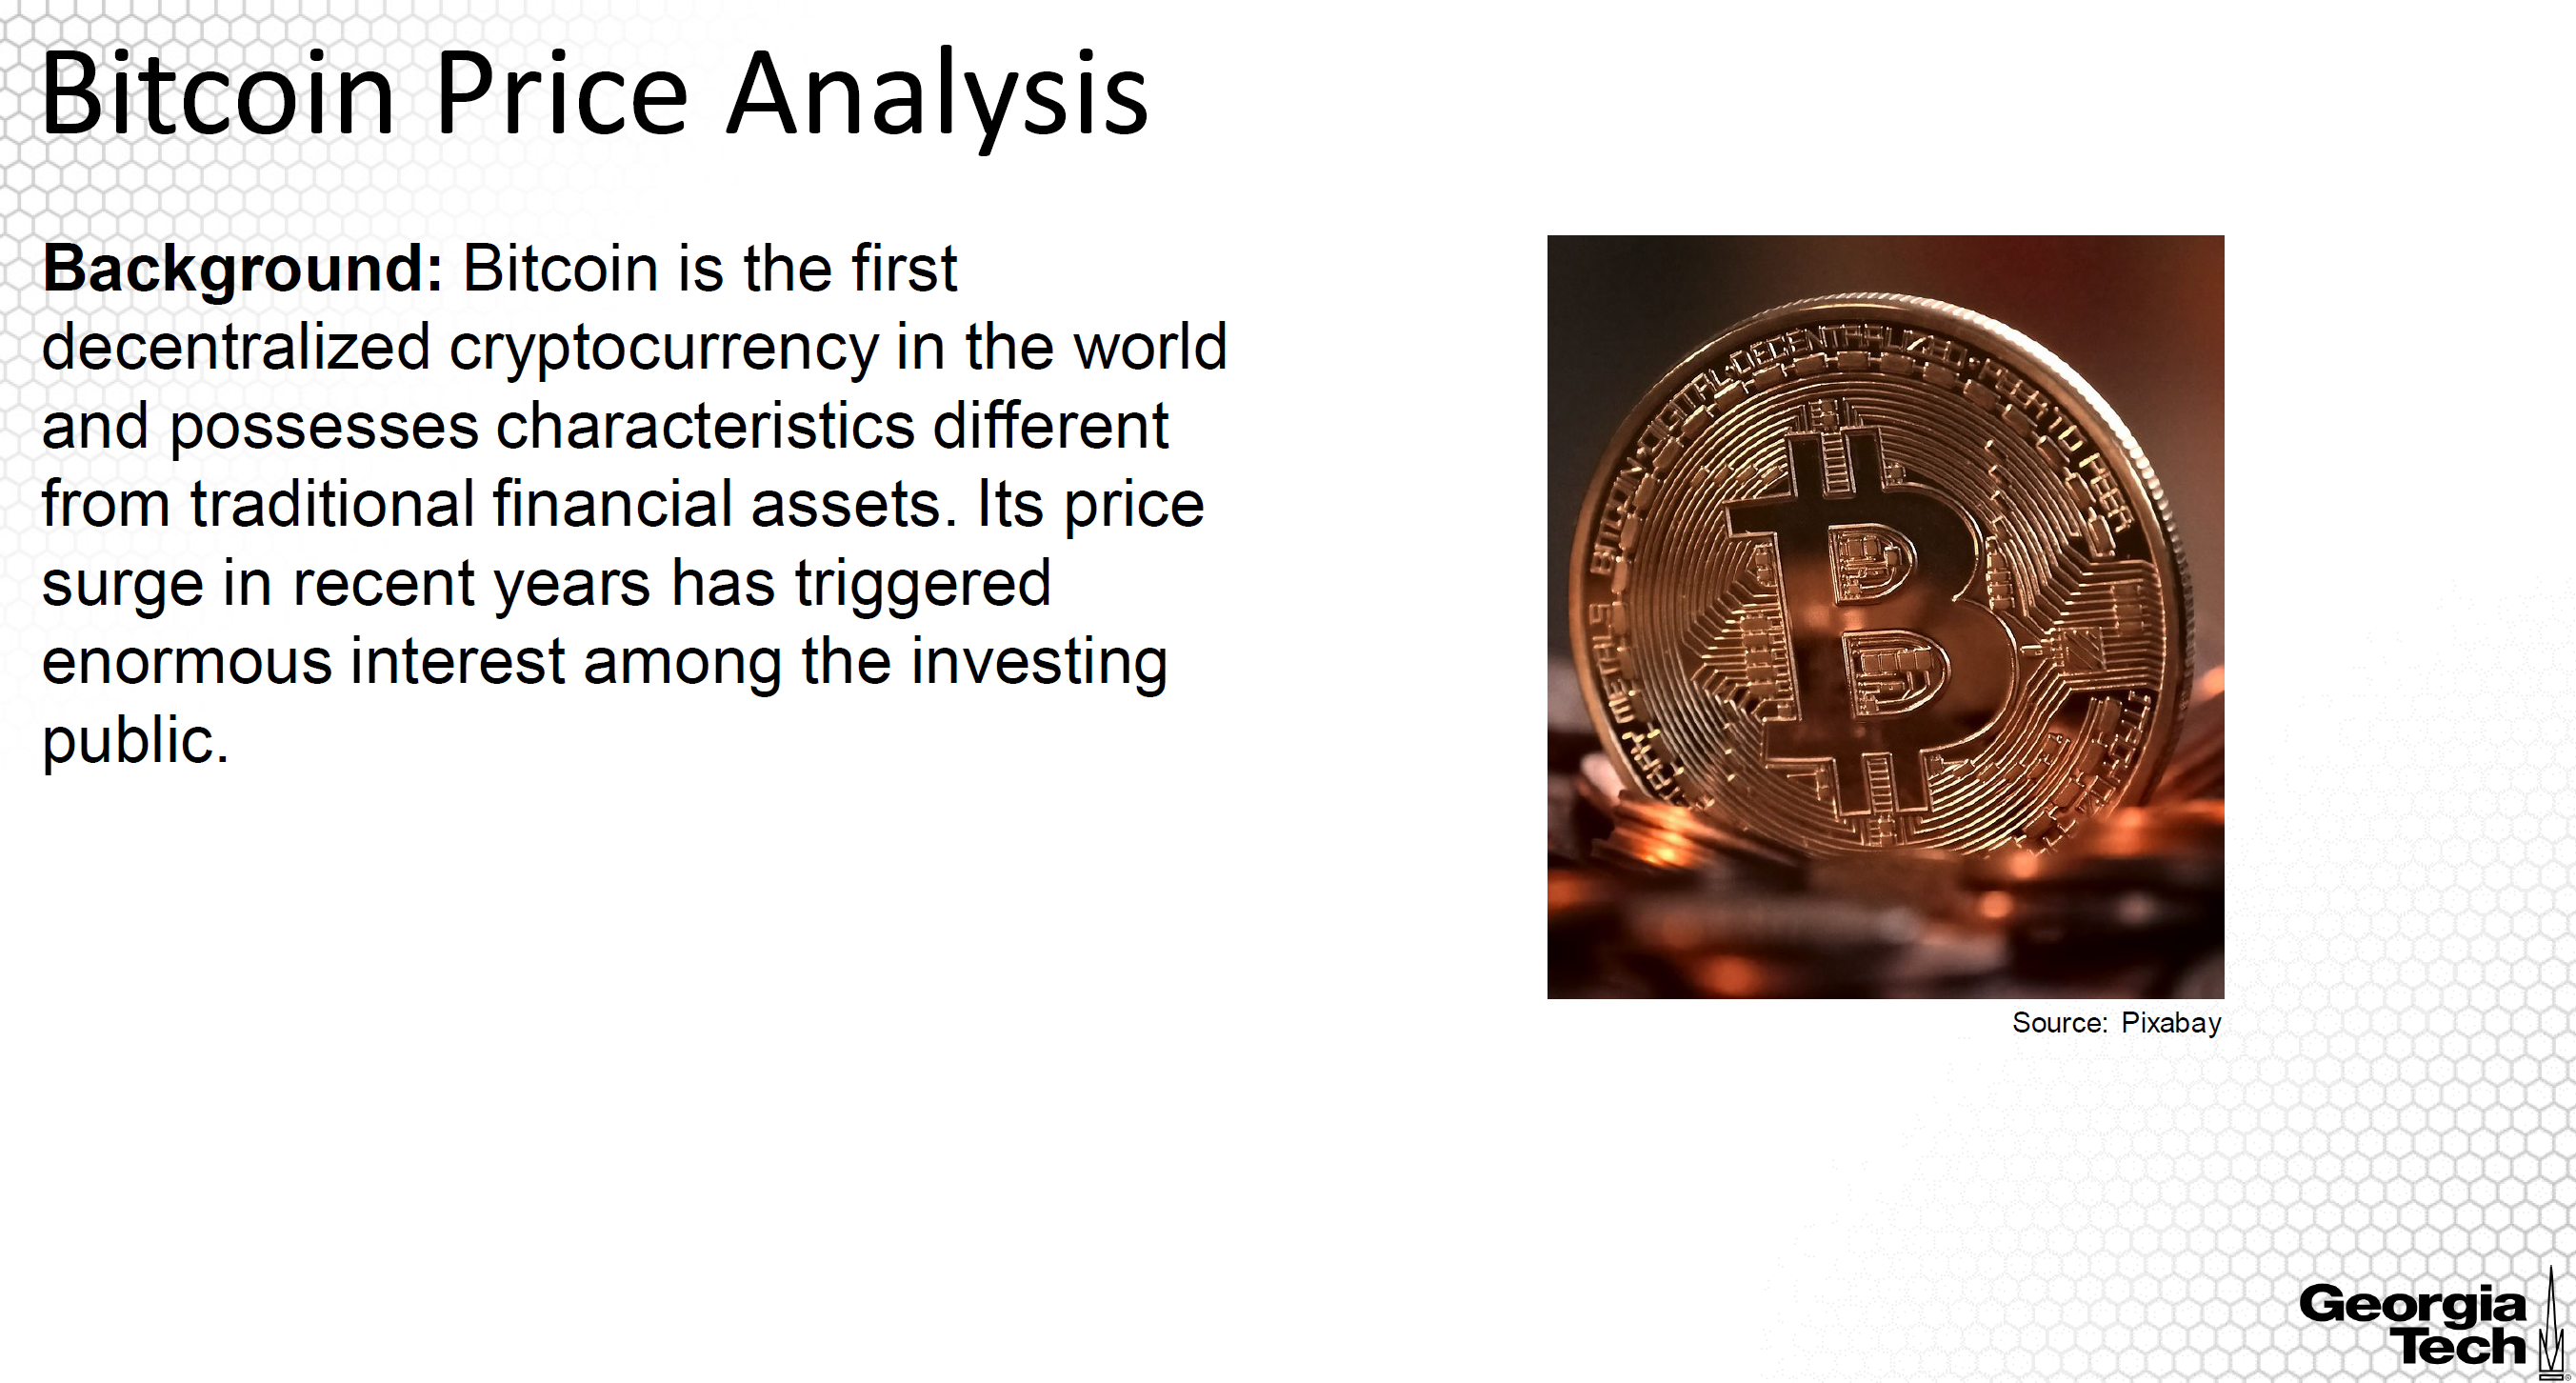

Bitcoin is the first decentralized cryptocurrency in the world and possesses characteristics different from traditional financial assets. Its price surge then when down in recent years, triggering enormous interest among the investing public. As we will discuss later in this course, the price of bitcoin has very wide volatility with large swings in the price ups and downs. 

While bitcoin has been invented in 2008, I will only analyze its price starting January 2017 because of its very interesting behavior within the recent years. 

In [15]:
library(xts)
#install.packages("tseries")
library(tseries)
#install.packages("mgcv")
library(mgcv)

### Exploratory Analysis

We will begin here with an exploratory analysis of the bitcoin price. I am providing the code 
- for reading the data and for transforming the dates then append both the price and the dates into a time series.
- Next, I am plotting the time series along with the sample auto correlation plot. 
- Then plot the differenced log-transformed time series and the corresponding sample auto correlation plots.

In [2]:
#======================== Import & Process Data ========================
# BTC-USD data
databtc=read.csv('BTCUSD-2.csv',header = TRUE)
head(databtc, 2)

pricebtc=databtc[,c(5)]
head(pricebtc, 3)

## check the structure of the dates to specify the dates in the command below
mydates = as.Date(databtc[, 1], "%m/%d/%Y")
head(mydates)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1/3/2017,1021.6,1044.08,1021.6,1043.84,1043.84,185168000
2,1/4/2017,1044.4,1159.42,1044.4,1154.73,1154.73,344945984


[1] 1043.84 1154.73 1013.38

[1] "2017-01-03" "2017-01-04" "2017-01-05" "2017-01-06" "2017-01-07"
[6] "2017-01-08"

In [3]:
tsbtc = xts(pricebtc, mydates)
head(tsbtc, 2)

dlbtc=diff(log(tsbtc))

              [,1]
2017-01-03 1043.84
2017-01-04 1154.73

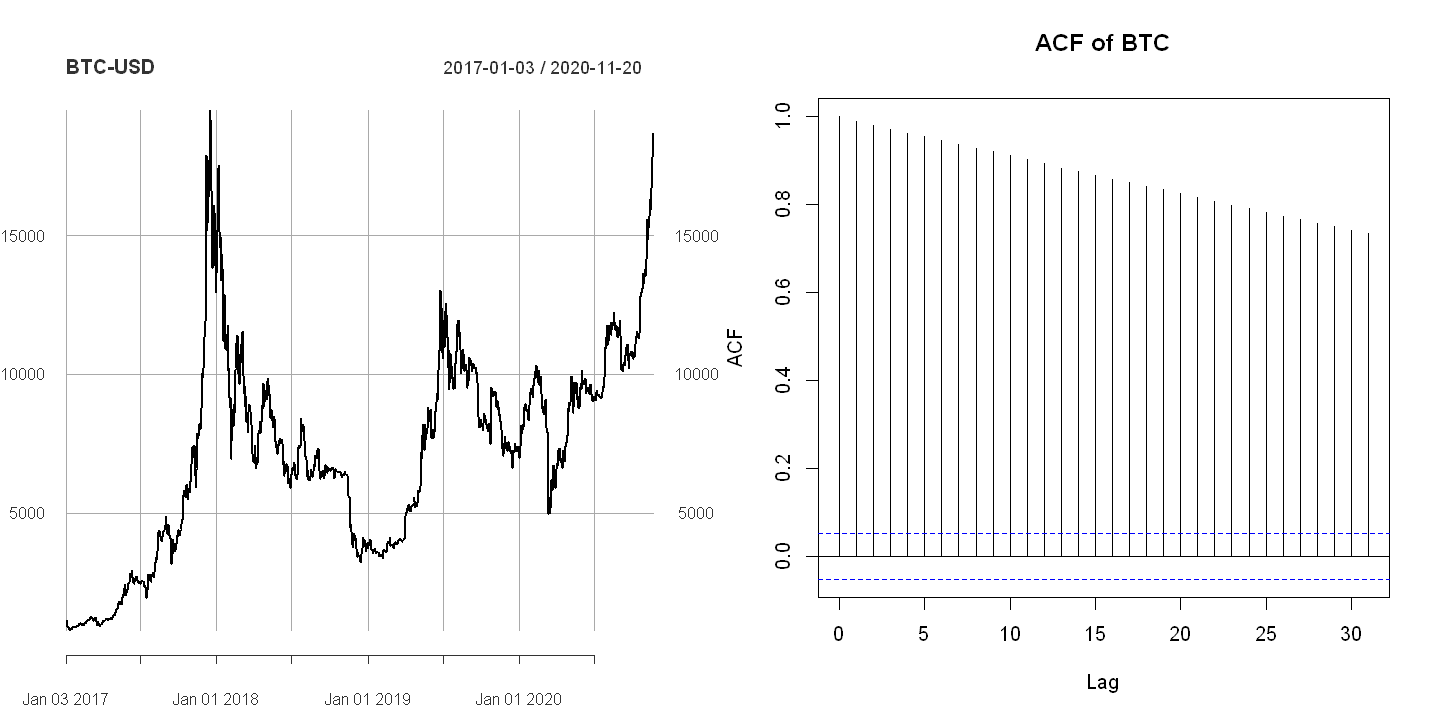

In [4]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

plot(tsbtc,main='BTC-USD')
acf(tsbtc,main='ACF of BTC')

From the plots for the time series,
- The time series is clearly non-stationarity with a nonlinear trend. 
- This is also clear from the acf plot; the autocorrelation decreases slowly with an increase of the lag.

### Exploratory Analysis: Log-Differenced Data

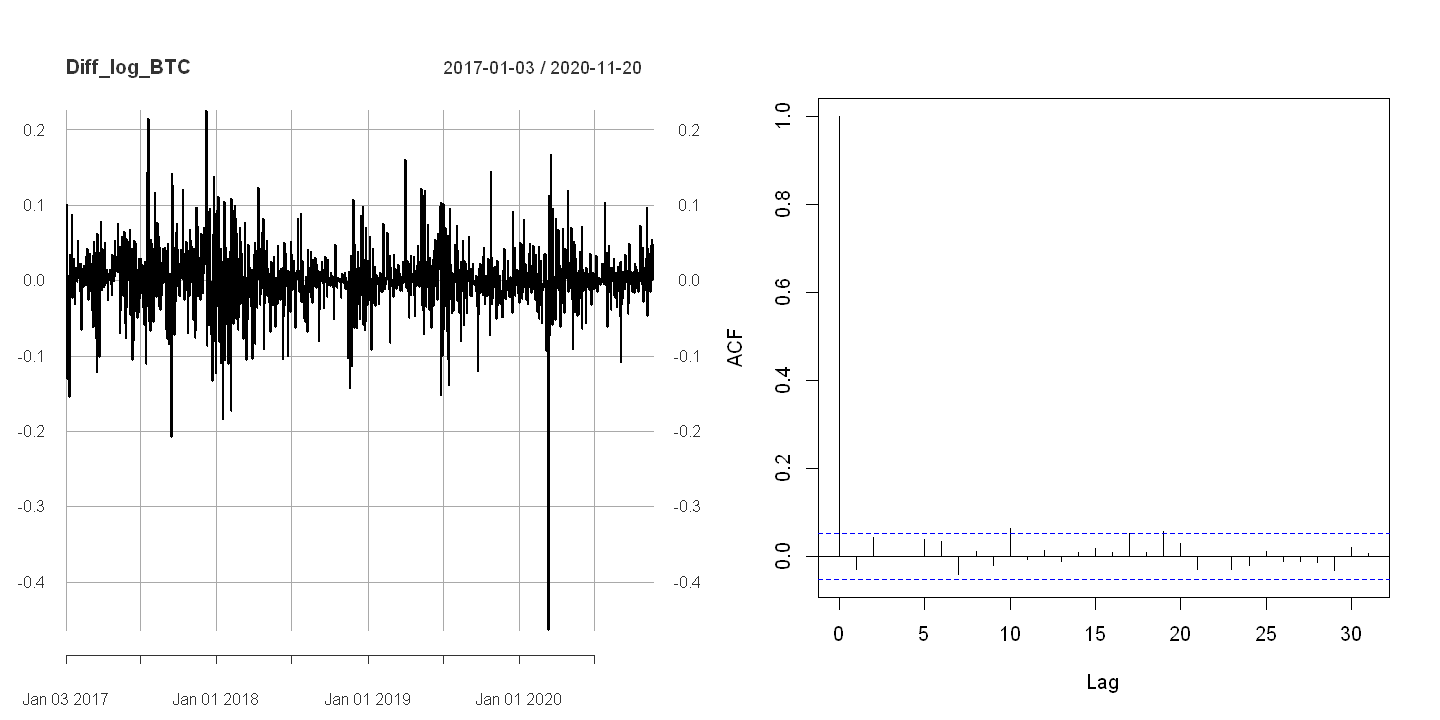

In [5]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

#Differenced Log Time Series
plot(dlbtc,main='Diff_log_BTC')
acf(dlbtc[-1],main='')

Above are the plots for the differenced log time series. For this time series, we can see that 
- the difference has removed the trend. 
- The variability of the time series is however changing over time. 
- If we look at the acf plot, the auto correlation is small for all lags larger than 0 an indication of week stationarity. 

We will see later in this course that this is common for the price of financial instruments such as stocks. Please note that we can have a weakly stationary process with volatility being different over time. In fact, we will learn in Module 3 how to model such time series.

### Exploratory Analysis: Stationarity Test

I will explore here stationarity using hypothesis testing. In this test, **the null hypothesis is that the time series is stationary while the alternative is that it is not stationary.** We will learn the details of such tests in the next module. 

Here I simply would like to illustrate this test using various commands in R. 
- First, the Ljung-Box test examines whether there is significant evidence for non-zero correlations at given lags, with the **null hypothesis of lack of autocorrelation in a given time series (a non-stationary signal will have a low p-value)**. This is test is most commonly used. 
- Another test is the Augmented Dickey–Fuller (ADF) test to find if the series has a unit root, for example, a series with a trend line will have a unit root and result in a large p-value. 
- Lastly, we can test if the time series is level or trend stationary using the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. Here we will test **the null hypothesis of trend stationarity; a low p-value will indicate a signal that is not trend stationary, has a unit root.** Again, we will come back to the concept of unit root and these tests in Module 2.

In [6]:
## Stationarity Test: Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
## Null Hypothesis: Stationary Time Series
kpss.test(dlbtc[-1])

# Ljung-Box test
Box.test(dlbtc[-1], lag = 5, type = 'Ljung-Box')

# Dickey-Fuller test
## Null Hypothesis: Non-Stationary Time Series
adf.test(dlbtc[-1], alternative = "stationary")

Warning message in kpss.test(dlbtc[-1]):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  dlbtc[-1]
KPSS Level = 0.18385, Truncation lag parameter = 7, p-value = 0.1



	Box-Ljung test

data:  dlbtc[-1]
X-squared = 5.8602, df = 5, p-value = 0.3201


Warning message in adf.test(dlbtc[-1], alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  dlbtc[-1]
Dickey-Fuller = -10.189, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


What we learn from this R implementation is that 
- *the p-value is small for the ADF test but large for the Box-Ljung test.*
- But be careful about the differences between the two tests. For the Box-Ljung test, we test the null hypothesis of stationarity while for the AF test, the alternative hypothesis is stationarity. 
- This means that **we seek large p-values for the Box-Ljung test, that is do not reject the null hypothesis**, 
- **while we seek small p-values for ADF test since we want to reject the null hypothesis.**

This example illustrates the need for knowing what a hypothesis test is about, specifically, what the null and the alternative hypotheses are stating. Please read carefully all the help menu for all testing procedure you will be employing in all statistical modeling and inference. 

To conclude, as we visually hinted to on the previous slide, **the time series is plausibly stationary as provided by these tests.**

### Trend Estimation: Bitcoin Price

We are applying here the same analysis for estimating the trend of the bitcoin price using nonparametric approach, specifically for fitting both the local polynomial and the splines regression.

In [7]:
## Trend Estimation for original time series
time.pts = c(1:length(mydates))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

## Local Polynomial Trend Estimation
loc.fit = loess(pricebtc~time.pts)
price.fit.loc = fitted(loc.fit)
loc.tsbtc=xts(price.fit.loc,mydates)

## Splines Trend Estimation
gam.fit = gam(pricebtc~s(time.pts))
summary(gam.fit)
price.fit.gam = fitted(gam.fit)
fit.tsbtc=xts(price.fit.gam,mydates)


Family: gaussian 
Link function: identity 

Formula:
pricebtc ~ s(time.pts)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7142.1       41.9   170.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 8.975      9 665.2  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.809   Deviance explained =   81%
GCV = 2.5076e+06  Scale est. = 2.4899e+06  n = 1418

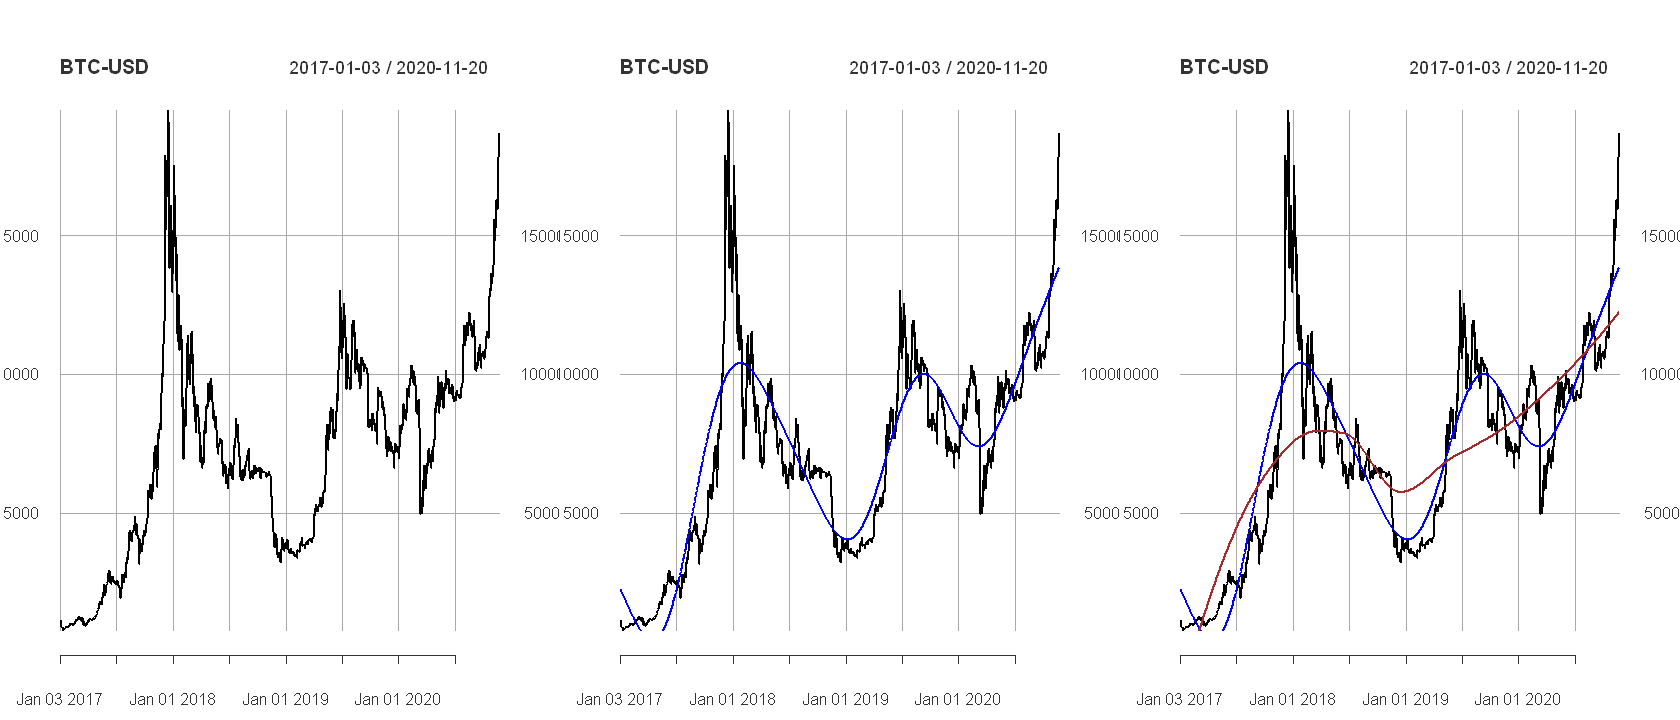

In [8]:
options(repr.plot.width=14, repr.plot.height=6)
par(mfrow=c(1,3))

plot(tsbtc,main='BTC-USD')
lines(fit.tsbtc,lwd=2,col="blue")
lines(loc.tsbtc,lwd=2,col="brown")

The plot of the observed price along with the fitted lines is shown. 
- The local polynomial is in brown and the splines regression fit is in blue. 
- The splines regression captures the non-linear trend better than polynomial smoothing. 

However, both are smooth fits of the trend, not capturing the more settle variations in the price

### Trend Estimation: Log Differenced Bitcoin Price

If you recall, I mentioned that the differenced log time series for bitcoin shows different variability over time. That is, while the time series itself is weakly stationary, we do see a varying trend in the squared time series. Here we will estimate the volatility of the difference log time series using the same trend estimation analysis, but this time not applied to the time series itself but the squared time series. 

In [9]:
## Trend Estimation for the log differenced time series (This is without squared time series)
## Splines Trend Estimation
diff.ts <- diff(log(pricebtc))
gam.fit.dif = gam(diff.ts~s(time.pts[-1]))
summary(gam.fit.dif)


Family: gaussian 
Link function: identity 

Formula:
diff.ts ~ s(time.pts[-1])

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.002036   0.001128   1.805   0.0713 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                  edf Ref.df     F p-value
s(time.pts[-1]) 4.998  6.093 1.401   0.208

R-sq.(adj) =  0.00419   Deviance explained = 0.77%
GCV = 0.0018099  Scale est. = 0.0018022  n = 1417

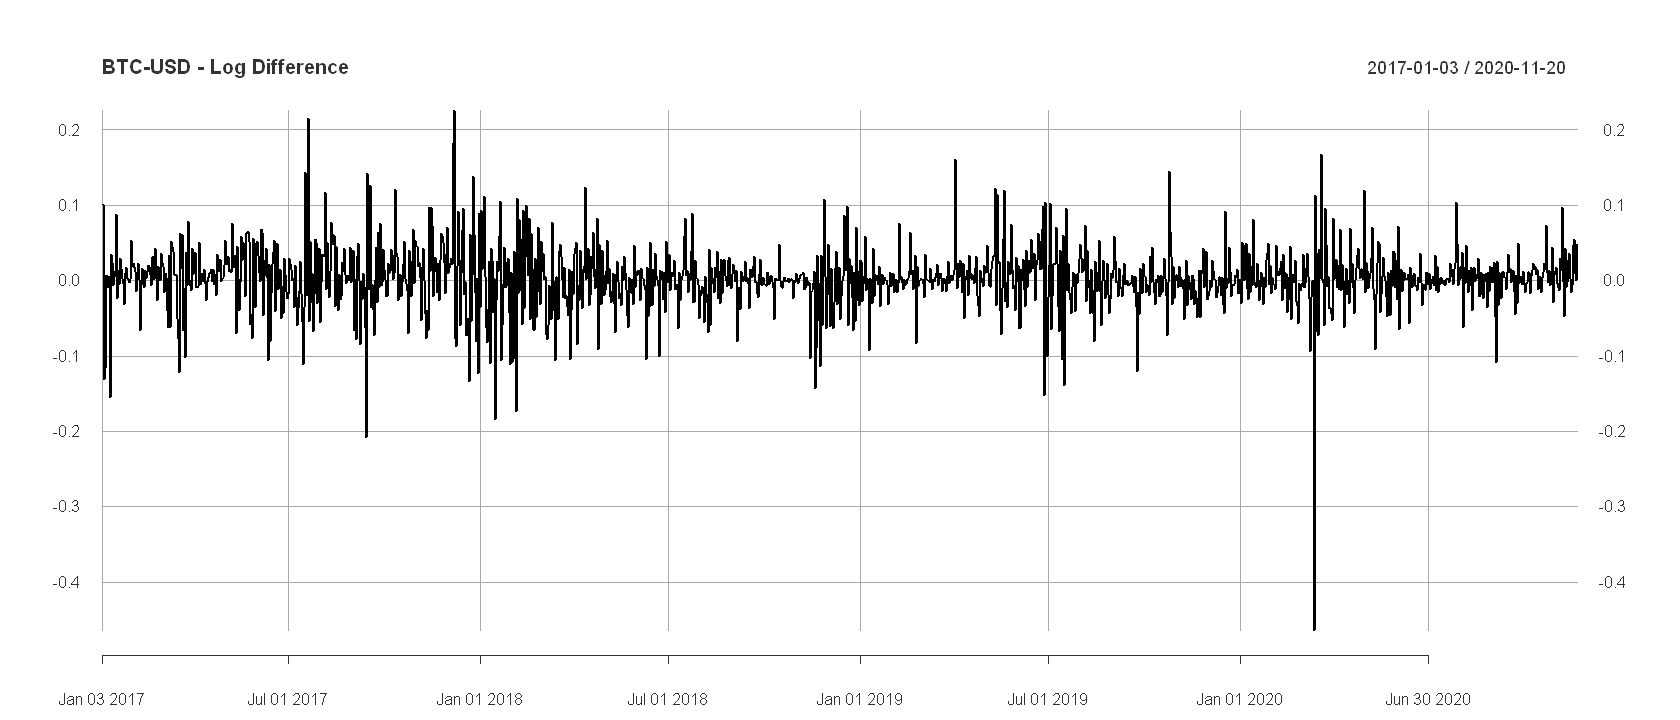

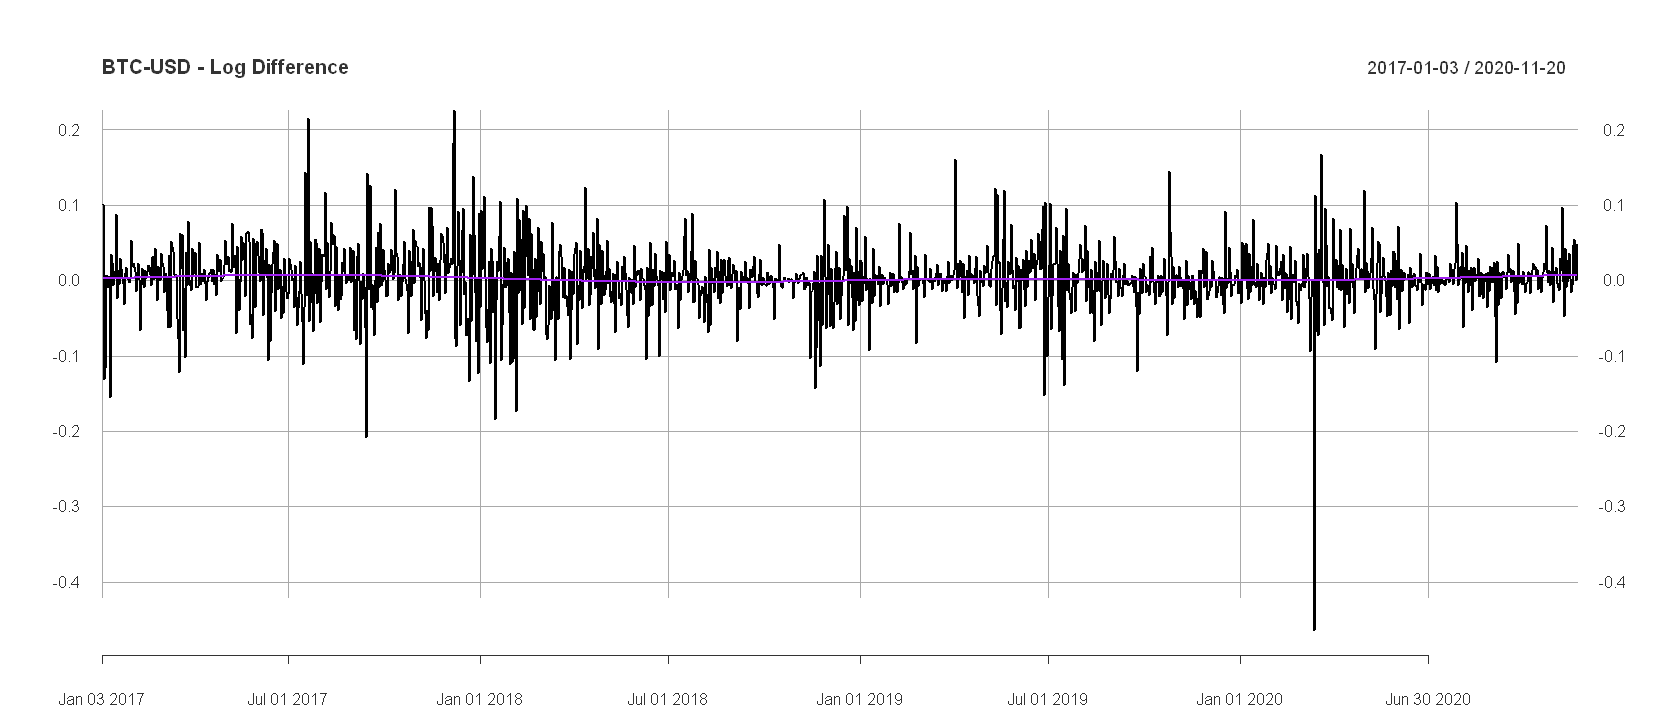

In [10]:
difprice.fit.gam = fitted(gam.fit.dif)

fit.tsbtc.dif=xts(difprice.fit.gam,mydates[-1])
plot(dlbtc,main='BTC-USD - Log Difference')
lines(fit.tsbtc.dif,lwd=2,col="purple")

#### Trend Estimation for the log differenced time series - Splines Trend Estimation with squared time series

In [11]:
diff.ts.sq <- diff.ts^2 
gam.fit.dif.sq = gam(diff.ts.sq~s(time.pts[-1]))
summary(gam.fit.dif.sq)


Family: gaussian 
Link function: identity 

Formula:
diff.ts.sq ~ s(time.pts[-1])

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0018127  0.0001837    9.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                  edf Ref.df     F p-value   
s(time.pts[-1]) 7.532  8.464 2.822 0.00332 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0131   Deviance explained = 1.84%
GCV = 4.8088e-05  Scale est. = 4.7799e-05  n = 1417

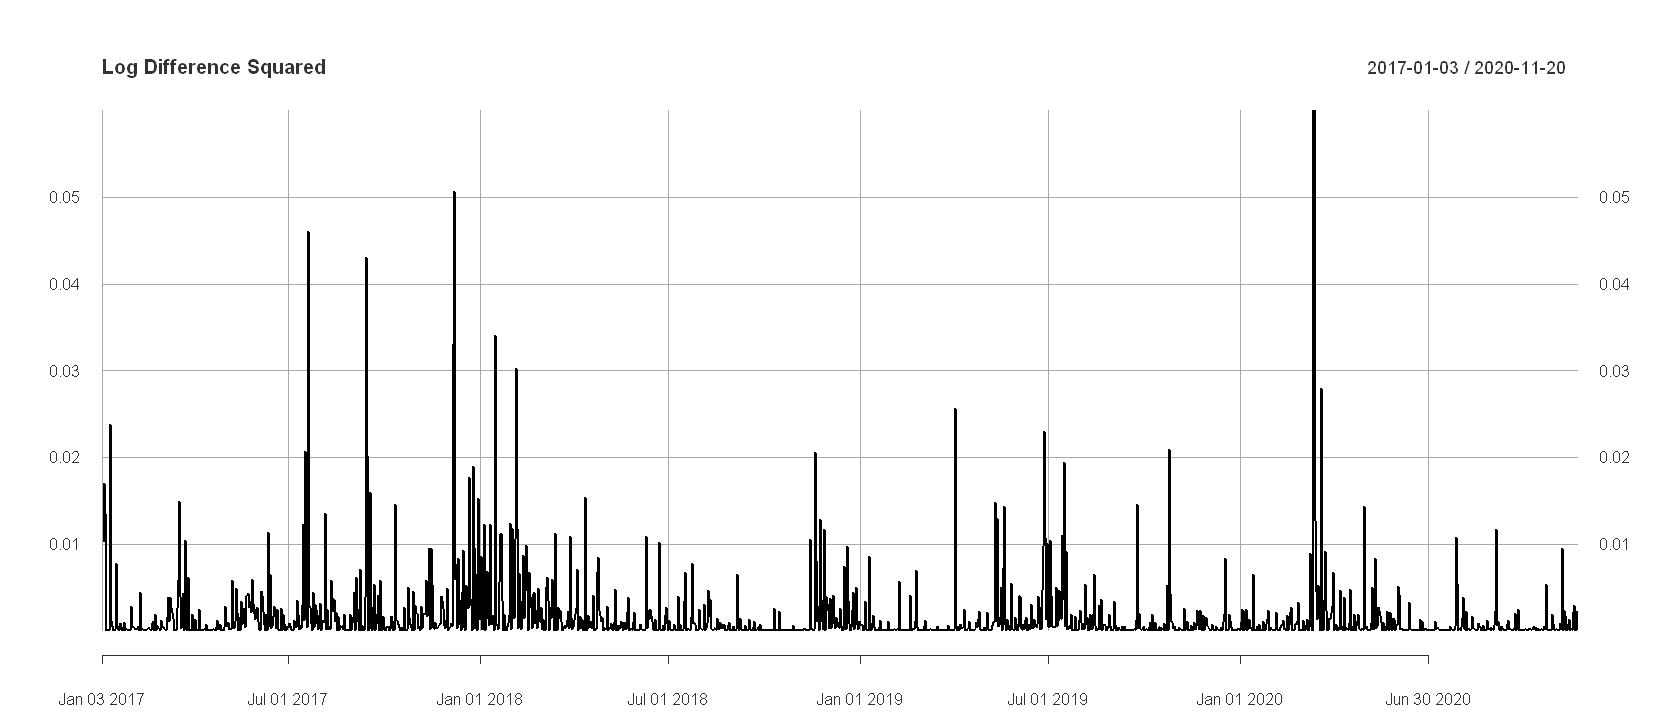

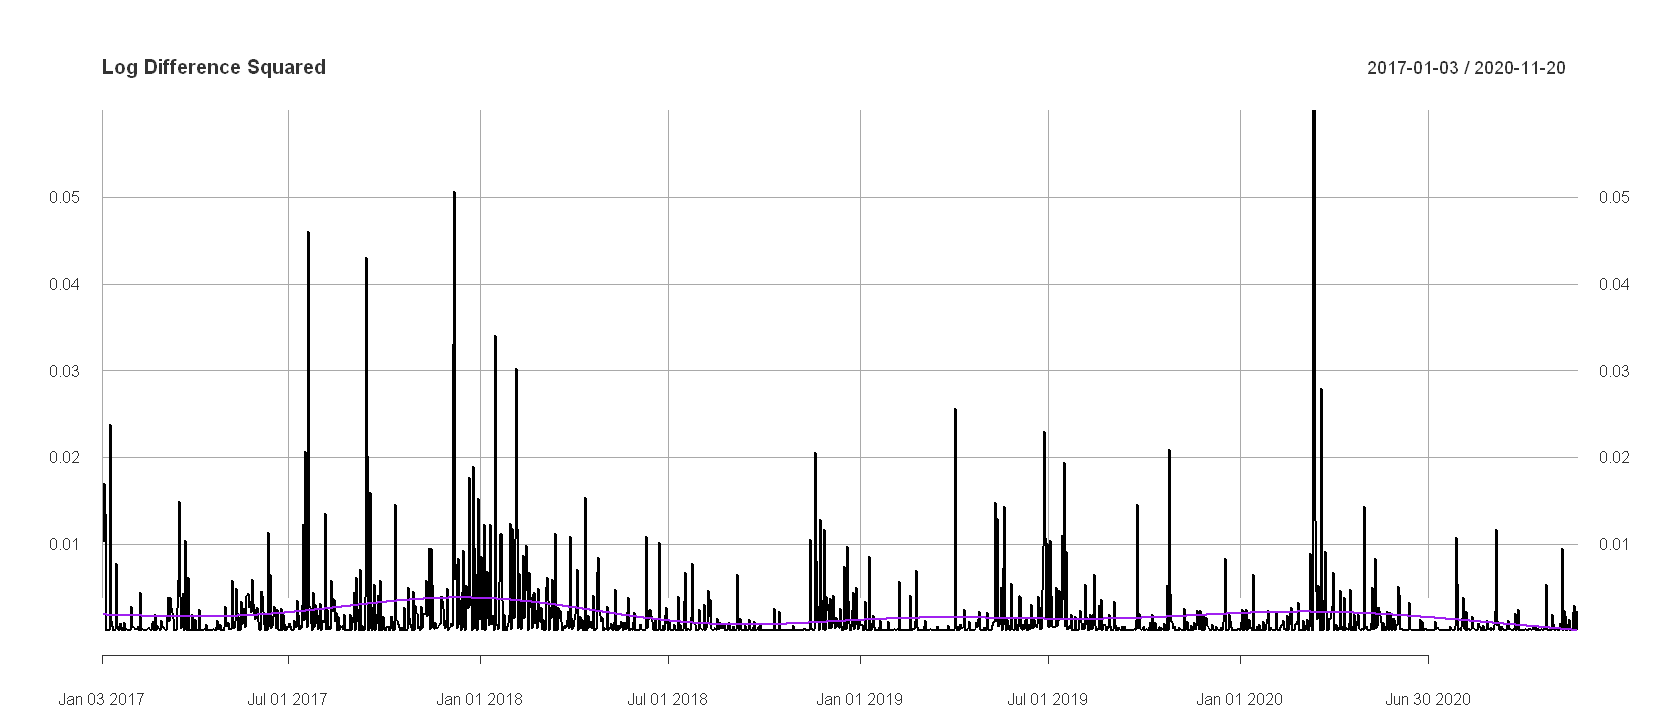

In [12]:
difprice.fit.gam = fitted(gam.fit.dif.sq)
fit.tsbtc.dif=xts(difprice.fit.gam,mydates[-1])
plot(dlbtc^2,main='Log Difference Squared',ylim=c(0,0.06))
lines(fit.tsbtc.dif,lwd=2,col="purple")

The plot the squared differenced time series along with the estimated volatility in purple is on the slide. 

Please note that I restricted the y axis to be smaller than 0.06 since during the covid19 crisis, we have seen very large swings in the log price. 

From this plot, we see that there have been several periods of time of high volatility including the covid19 crisis.

### Is there seasonality in bitcoin price?

- We have seen that the fitted trend using the nonparametric approach has not captured some of the smaller variations.
- Could then a seasonality fit capture that?
- Here we are adding a seasonal component to the model using the seasonal means model. 

I then am comparing the fitted trend and the fitted seasonality and trend together.

In [13]:
## Is there a seasonality? 
month = as.factor(format(mydates,"%b"))
gam.fit.seastr.1 = gam(pricebtc~s(time.pts)+month)
summary(gam.fit.seastr.1)


Family: gaussian 
Link function: identity 

Formula:
pricebtc ~ s(time.pts) + month

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9546.8      254.7  37.485  < 2e-16 ***
monthAug     -5993.0      442.7 -13.538  < 2e-16 ***
monthDec      -204.0      396.6  -0.514 0.607115    
monthFeb      1783.9      268.6   6.642 4.43e-11 ***
monthJan      1403.9      339.2   4.139 3.69e-05 ***
monthJul     -4981.7      371.4 -13.413  < 2e-16 ***
monthJun     -2961.1      285.4 -10.374  < 2e-16 ***
monthMar       995.6      202.1   4.927 9.34e-07 ***
monthMay      -765.8      205.8  -3.721 0.000206 ***
monthNov     -3894.3      476.6  -8.171 6.77e-16 ***
monthOct     -6420.2      496.0 -12.944  < 2e-16 ***
monthSep     -7096.0      484.5 -14.646  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 8.992      9 864.8  <2e-16 ***
---


**If we look at the statistical significance of the regression coefficients corresponding to the seasonal effects, we see that most of them are statistically significant given the nonparametric trend included in the model. It is possible that the time series to present some cyclical patterns.**

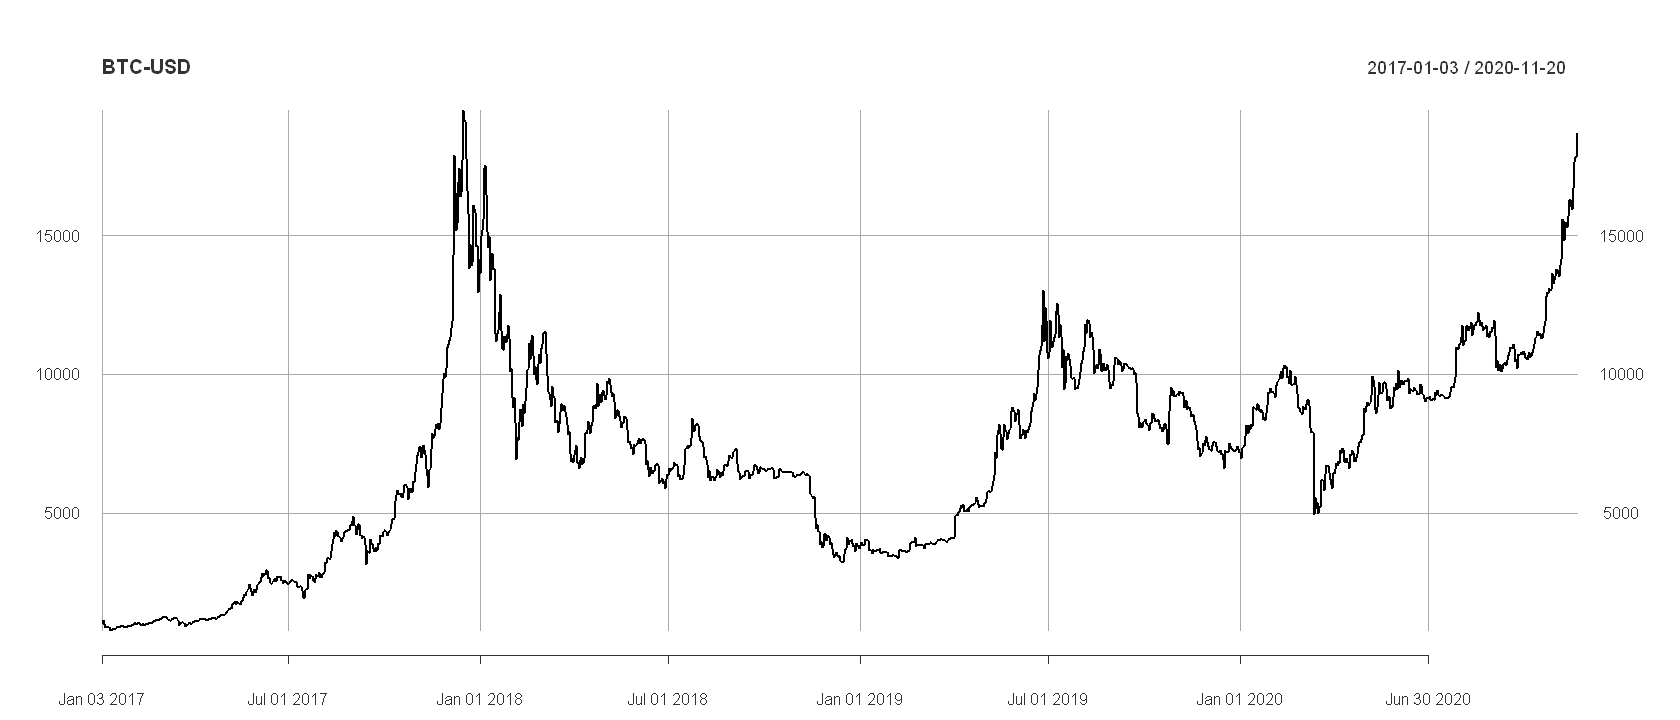

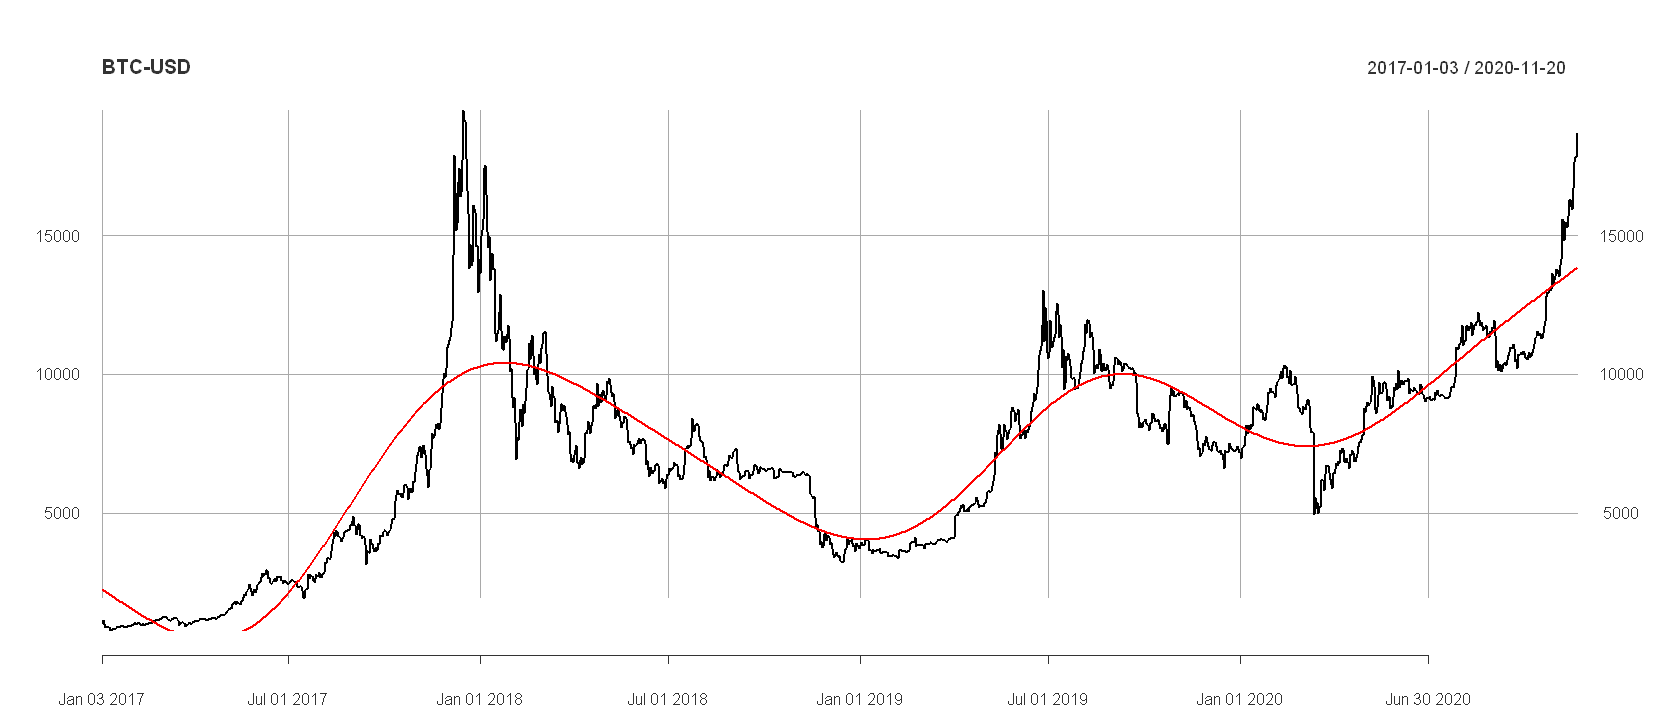

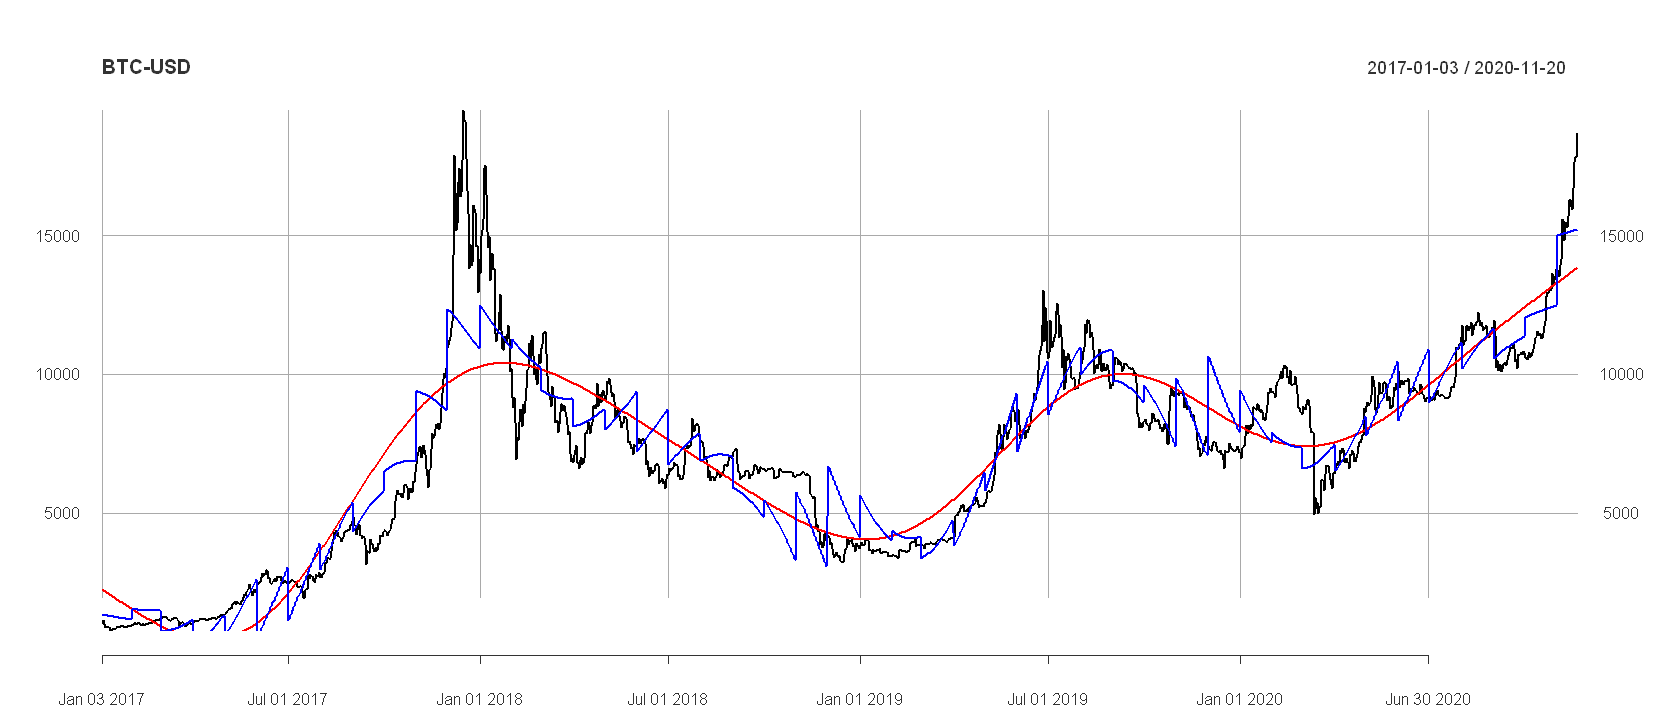

In [14]:
fitseastr.tsbtc=xts(fitted(gam.fit.seastr.1),mydates)

plot(tsbtc,main='BTC-USD')
lines(fit.tsbtc,lwd=2,col="red")
lines(fitseastr.tsbtc,lwd=2,col="blue")

- The seasonality-trend fit does not improve the fit as shown by the blue fit. 
- While the blue fit adds the seasonal variations, those don’t seem to follow the variations in the time series.

### Findings

The main findings from this study are as follows. 

- There is a nonlinear trend in the Bitcoin price over the past few years. 
- The differencing of the log-time series is weakly stationary although with time-varying volatility. We will come back to this concept in Module 3 of this course. 
- There seems to be a statistically significant seasonality in the Bitcoin price, however the trend and seasonality fit together does not seem to fit the observed variations in the price. 

### End of exploratory analysis of the Bitcoin price 